<a href="https://colab.research.google.com/github/roiei/roiei.github.io/blob/main/02_ML_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import random
import collections
import os, math
import time
from util import *

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
matplotlib.use('agg')

_X_ = None

# Problem B

In [25]:
def extractWordFeatures(x):
    """
    Extract word features for a string x. Words are delimited by
    whitespace characters only.
    @param string x: 
    @return dict: feature vector representation of x.
    Example: "I am what I am" --> {'I': 2, 'am': 2, 'what': 1}
    """
    res = {}
    for word in x.split():
      if word not in res:
        res[word] = 0
      res[word] += 1
    return res

In [26]:
print('========== Problem B ==========')
print('---------- Test b0 ----------')
output = extractWordFeatures("a b a")
answer = {"a":2, "b":1}
print("output : %s" % output)
print("answer : %s" % answer)

========== Problem B ==========
---------- Test b0 ----------
output : {'a': 2, 'b': 1}
answer : {'a': 2, 'b': 1}


In [27]:
print('---------- Test b1 ----------')
random.seed(42)
for i in range(10):
    sentence = ' '.join([random.choice(['a', 'aa', 'ab', 'b', 'c']) for _ in range(100)])
output = extractWordFeatures(sentence)
print("output : %s" % output)
print("answer : %s" % "{'ab': 20, 'a': 20, 'aa': 15, 'c': 19, 'b': 26}")

---------- Test b1 ----------
output : {'ab': 20, 'a': 20, 'aa': 15, 'c': 19, 'b': 26}
answer : {'ab': 20, 'a': 20, 'aa': 15, 'c': 19, 'b': 26}


# Problem C

In [72]:
def learnPredictor(trainExamples, testExamples, featureExtractor, numIters, eta):
    '''
    Given |trainExamples| and |testExamples| (each one is a list of (x,y)
    pairs), a |featureExtractor| to apply to x, and the number of iterations to
    train |numIters|, the step size |eta|, return the weight vector (sparse
    feature vector) learned, and error values lists for train and test datasets

    You should implement stochastic gradient descent.

    Note: only use the trainExamples for training!
    You should call evaluatePredictor() on both trainExamples and testExamples
    to see how you're doing as you learn after each iteration.
    '''
    weights = {}
    trainErrorList = []
    testErrorList = []

    def predictor(x):
        phi = featureExtractor(x)
        if dotProduct(weights, phi) >= 0:
          y = 1
        else:
          y = -1
        return y

    for t in range(numIters):
        for trainExample in trainExamples:
            x, y = trainExample
            phi = featureExtractor(x)

            # loss = max(0, 1 - w ⋅ 𝜙(x)y))
            loss = max(0, 1 - dotProduct(phi, weights)*y)

            # update the weight vector
            if loss > 0:              
                # w <- w + 𝜂𝜙(x)y                
                increment(weights, eta*y, phi)  # 'increment' is defined in util.py

        train_error = evaluatePredictor(trainExamples, predictor)
        test_error = evaluatePredictor(testExamples, predictor)
        print("%d-th iteration: train error = %.2f, test error = %.2f"% \
              (t, train_error, test_error))
        
        trainErrorList.append(train_error)
        testErrorList.append(test_error)

    # END_YOUR_CODE

    return weights, trainErrorList, testErrorList

In [73]:
print('========== Problem C ==========')
print('---------- Test c0 ----------')
trainExamples = (("pretty good", 1), ("bad plot", -1), ("not good", -1), ("pretty scenery", 1))
testExamples = (("pretty", 1), ("bad", -1))
weights, _, _ = learnPredictor(trainExamples, testExamples, extractWordFeatures, numIters=1, eta=1)
print(weights)

========== Problem C ==========
---------- Test c0 ----------
0-th iteration: train error = 0.00, test error = 0.00
{'pretty': 1, 'good': 0, 'bad': -1, 'plot': -1, 'not': -1}


In [74]:
print('---------- Test c1 ----------')
trainExamples = (("hello world", 1), ("goodnight moon", -1))
testExamples = (("hello", 1), ("moon", -1))
weights, _, _ = learnPredictor(trainExamples, testExamples, extractWordFeatures, numIters=20, eta=0.01)
print("weight for `hello\' : %f (should > 0)" % weights['hello'])
print("weight for `moon\' : %f (should < 0)" % weights['moon'])

---------- Test c1 ----------
0-th iteration: train error = 0.00, test error = 0.00
1-th iteration: train error = 0.00, test error = 0.00
2-th iteration: train error = 0.00, test error = 0.00
3-th iteration: train error = 0.00, test error = 0.00
4-th iteration: train error = 0.00, test error = 0.00
5-th iteration: train error = 0.00, test error = 0.00
6-th iteration: train error = 0.00, test error = 0.00
7-th iteration: train error = 0.00, test error = 0.00
8-th iteration: train error = 0.00, test error = 0.00
9-th iteration: train error = 0.00, test error = 0.00
10-th iteration: train error = 0.00, test error = 0.00
11-th iteration: train error = 0.00, test error = 0.00
12-th iteration: train error = 0.00, test error = 0.00
13-th iteration: train error = 0.00, test error = 0.00
14-th iteration: train error = 0.00, test error = 0.00
15-th iteration: train error = 0.00, test error = 0.00
16-th iteration: train error = 0.00, test error = 0.00
17-th iteration: train error = 0.00, test err

In [75]:
polarity_train_path = os.path.join('data', 'polarity.train')
polarity_dev_path = os.path.join('data', 'polarity.dev')

print('---------- Test c2 ----------')
trainExamples = readExamples(polarity_train_path)
testExamples = readExamples(polarity_dev_path)

weights, trainErrorsUnigram, testErrorsUnigram = learnPredictor(trainExamples, testExamples, extractWordFeatures, numIters=20, eta=0.01)

outputWeights(weights, os.path.join('result', 'weights'))
outputErrorAnalysis(testExamples, extractWordFeatures, weights, os.path.join('result', 'error-analysis'))  # Use this to debug

trainError = evaluatePredictor(trainExamples, lambda x : (1 if dotProduct(extractWordFeatures(x), weights) >= 0 else -1))
testError = evaluatePredictor(testExamples, lambda x : (1 if dotProduct(extractWordFeatures(x), weights) >= 0 else -1))

print("Final train error = %s (should < 0.04)" % trainError)
print("Final test error = %s (should < 0.30)" % testError)

---------- Test c2 ----------
Read 3554 examples from data/polarity.train
Read 3554 examples from data/polarity.dev
0-th iteration: train error = 0.29, test error = 0.35
1-th iteration: train error = 0.22, test error = 0.33
2-th iteration: train error = 0.18, test error = 0.31
3-th iteration: train error = 0.15, test error = 0.30
4-th iteration: train error = 0.13, test error = 0.29
5-th iteration: train error = 0.11, test error = 0.29
6-th iteration: train error = 0.10, test error = 0.29
7-th iteration: train error = 0.08, test error = 0.28
8-th iteration: train error = 0.08, test error = 0.28
9-th iteration: train error = 0.07, test error = 0.28
10-th iteration: train error = 0.06, test error = 0.28
11-th iteration: train error = 0.06, test error = 0.28
12-th iteration: train error = 0.05, test error = 0.27
13-th iteration: train error = 0.05, test error = 0.28
14-th iteration: train error = 0.05, test error = 0.28
15-th iteration: train error = 0.04, test error = 0.27
16-th iteratio

# Problem D

In [77]:
%matplotlib inline

========== Problem D ==========


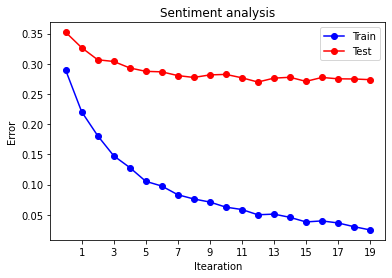

In [78]:
print('========== Problem D ==========')
visualizePredictorError(trainErrorsUnigram, testErrorsUnigram)

# Problem F

In [95]:
# Problem F: extractBigramFeatures Problem
def extractBigramFeatures(x, n_gram=2):
    """
    Extract unigram(word) and bigram features for a string x.
    @param string x: 
    @return dict: feature vector representation of x.
    Example: "I am what I am" --> {('am', 'what'): 1, 'what': 1, ('I', 'am'): 2, 'I': 2, ('what', 'I'): 1, 'am': 2, ('<s>', 'I'): 1, ('am', '</s>'): 1}
    """
    phi = extractWordFeatures(x)
    x = '<s> ' + x + ' </s>'

    words = x.split()
    for i in range(len(words) - n_gram):
      pair = tuple(words[i:i + n_gram])
      #pair = (words[i], words[i + 1], words[i + 2])
      phi[pair] = phi.get(pair, 0) + 1
    
    n_gram = 3
    for i in range(len(words) - n_gram):
      pair = tuple(words[i:i + n_gram])
      #pair = (words[i], words[i + 1], words[i + 2])
      phi[pair] = phi.get(pair, 0) + 1

    return phi

In [96]:
extractBigramFeatures("I am what I am")

{('<s>', 'I'): 1,
 ('<s>', 'I', 'am'): 1,
 ('I', 'am'): 2,
 ('I', 'am', 'what'): 1,
 ('am', 'what'): 1,
 ('am', 'what', 'I'): 1,
 ('what', 'I'): 1,
 ('what', 'I', 'am'): 1,
 'I': 2,
 'am': 2,
 'what': 1}

In [97]:
print('========== Problem F ==========')
print('---------- Test f0 ----------')

trainExamples = readExamples(polarity_train_path)
testExamples = readExamples(polarity_dev_path)

weightsBigram, trainErrorsBigram, testErrorsBigram = learnPredictor(trainExamples, testExamples, extractBigramFeatures,numIters=20, eta=0.01)
outputWeights(weightsBigram, os.path.join('result', 'weights-bigram'))

outputErrorAnalysis(testExamples, extractBigramFeatures, weightsBigram, os.path.join('result', 'error-analysis-bigram'))  # Use this to debug

trainErrorBigram = evaluatePredictor(trainExamples, lambda x: (1 if dotProduct(extractBigramFeatures(x), weightsBigram) >= 0 else -1))
testErrorBigram = evaluatePredictor(testExamples,lambda x: (1 if dotProduct(extractBigramFeatures(x), weightsBigram) >= 0 else -1))

print("Final train error = %s (should < 0.04)" % trainErrorBigram)
print("Final test error = %s (should < 0.27)" % testErrorBigram)

========== Problem F ==========
---------- Test f0 ----------
Read 3554 examples from data/polarity.train
Read 3554 examples from data/polarity.dev
0-th iteration: train error = 0.14, test error = 0.33
1-th iteration: train error = 0.03, test error = 0.30
2-th iteration: train error = 0.01, test error = 0.29
3-th iteration: train error = 0.00, test error = 0.28
4-th iteration: train error = 0.00, test error = 0.27
5-th iteration: train error = 0.00, test error = 0.27
6-th iteration: train error = 0.00, test error = 0.26
7-th iteration: train error = 0.00, test error = 0.27
8-th iteration: train error = 0.00, test error = 0.27
9-th iteration: train error = 0.00, test error = 0.26
10-th iteration: train error = 0.00, test error = 0.26
11-th iteration: train error = 0.00, test error = 0.26
12-th iteration: train error = 0.00, test error = 0.26
13-th iteration: train error = 0.00, test error = 0.26
14-th iteration: train error = 0.00, test error = 0.26
15-th iteration: train error = 0.00, 

# Problem G

========== Problem G ==========


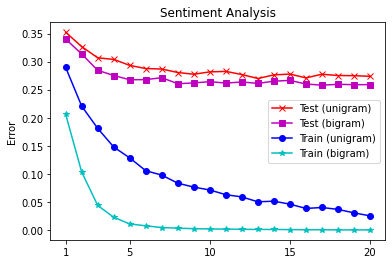

In [83]:
print('========== Problem G ==========')
visualizeUnigramAndBigram(trainErrorsUnigram, testErrorsUnigram, trainErrorsBigram, testErrorsBigram)

# Problem K

In [ ]:
def kmeans(examples, K, maxIters):
    '''
    examples: list of examples, each example is a string-to-double dict representing a sparse vector.
    K: number of desired clusters. Assume that 0 < K <= |examples|.
    maxIters: maximum number of iterations to run for (you should terminate early if the algorithm converges).
    Return: (length K list of cluster centroids,
            list of assignments, (i.e. if examples[i] belongs to centers[j], then assignments[i] = j)
            final reconstruction loss)
    '''
    # BEGIN_YOUR_CODE
    raise NotImplementedError
    centers = random.sample(examples, K)
    assignments = None

    def get_l2_loss(cluster_id, example):
        center = centers[cluster_id]
        features = set(list(center.keys()) + list(example.keys()))
        return sum((center.get(feature, 0) - example.get(feature, 0)) ** 2 for feature in features)

    def vec_sum(vectors):
        total = {}
        for vec in vectors:
            increment(total, 1., vec)
        return total

    def vec_div(vec, scalar):
        return {feature: value / scalar for feature, value in vec.items()}

    for iter_cnt in range(maxIters):
        prev_assignments = assignments
        assignments = [0] * len(examples)

        # update assignments
        for example_id, example in enumerate(examples):
            assignments[example_id] = min(range(K),
                                          key=lambda x: _X_)  # use 'get_l2_loss'
        # terminate when converging
        if _X_:
            print('k-means converged')
            break

        # update centers
        clusters = [[] for _ in range(K)]
        for example_id, example in enumerate(examples):
            cluster_id = _X_  # use 'assignments'
            clusters[cluster_id].append(example)
 
        centers = [_X_  # use 'vec_div' and 'vec_sum'
                   for cluster in clusters]

    else:
        print('max iteration')

    loss = 0
    for example_id, example in enumerate(examples):
        loss += get_l2_loss(assignments[example_id], example)

    # END_YOUR_CODE
    return centers, assignments, loss

In [ ]:
print('========== Problem K ==========')
print('---------- Test k0 ----------')
random.seed(42)
x1 = {0:0, 1:0} # x1 => (0, 0)
x2 = {0:0, 1:1} # x2 => (0, 1)
x3 = {0:0, 1:2} # x3 => (0, 2)
x4 = {0:0, 1:3} # x4 => (0, 3)
x5 = {0:0, 1:4} # x5 => (0, 4)
x6 = {0:0, 1:5} # x6 => (0, 5)
examples = [x1, x2, x3, x4, x5, x6]

centers, assignments, totalCost = kmeans(examples, 2, maxIters=10)
# (there are two stable centroid locations)
print(centers)
print(assignments)
print("output square loss : %.1f" % totalCost)
print("answer square loss : 4.0 or 5.5")

In [ ]:
print('---------- Test k1 ----------')
K = 6
numExamples = 1000
numFillerWords = 1000
testClustering(kmeans, K, numExamples, numFillerWords)

In [ ]:
print('---------- Test k2 ----------')
K = 6
numExamples = 10000
numFillerWords = 10000
testClustering(kmeans, K, numExamples, numFillerWords)  # 200 seconds in my PC

In [ ]:
print('---------- Test k3 ----------')
texts = ['I like apple', 'I like orange', 'I hate math', 'I hate python']
examples = [{word: 1 for word in text.split()} for text in texts]

centers, assignments, totalCost = kmeans(examples, 2, maxIters=10)
print(centers)
print(assignments)

# Problem L

In [ ]:
print('========== Problem L ==========')
# x1 = {0:0, 1:0} # x1 => (0, 0)
# x2 = {0:0, 1:1} # x2 => (0, 1)
# x3 = {0:2, 1:0} # x3 => (2, 0)
# x4 = {0:2, 1:1} # x4 => (2, 1)
# simple_examples = [x1, x2, x3, x4]
np.random.seed(10)
example_array = np.append(np.random.multivariate_normal(mean=(2, 2), cov=((1, 0), (0, 1)), size=30),
                          np.random.multivariate_normal(mean=(-2, -2), cov=((1, 0), (0, 1)), size=30),
                          axis=0)
examples = [{0: ex[0], 1: ex[1]} for ex in example_array]
centers, assignments, totalCost = kmeans(examples, 2, maxIters=10)

visualizeClusters(examples, assignments, centers)

# Problem M

In [ ]:
def kmeans_optimized(examples, K, maxIters):
    '''
    examples: list of examples, each example is a string-to-double dict representing a sparse vector.
    K: number of desired clusters. Assume that 0 < K <= |examples|.
    maxIters: maximum number of iterations to run for (you should terminate early if the algorithm converges).
    Return: (length K list of cluster centroids,
            list of assignments, (i.e. if examples[i] belongs to centers[j], then assignments[i] = j)
            final reconstruction loss)
    '''
    # BEGIN_YOUR_CODE
    raise NotImplementedError
    # END_YOUR_CODE
    return centers, assignments, loss

In [ ]:
print('========== Problem M ==========')
K = 6
numExamples = 10000
numFillerWords = 10000
testClustering(kmeans_optimized, K, numExamples, numFillerWords)